In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [6]:
df = pd.read_csv("Concrete_Data.csv")
y = df["Con_com"]
x = df.iloc[:, :-1]
X_train, X_test1, y_train, y_test1  = train_test_split(x, y,test_size=0.3, random_state=420, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_test1, y_test1,test_size=0.5, random_state=None, shuffle=True)

In [7]:
def test_model (model_name, df_name, X_train, y_train, X_test,y_test, X_valid, y_valid ):
    
    df_train = pd.DataFrame()
    train_predict = model_name.predict(X_train)
    df_train["y_train"] = y_train.tolist()
    df_train["train_predict"] = train_predict.tolist()
    print(model_name.score(X_train, y_train))



    df_test = pd.DataFrame()
    test_predict = model_name.predict(X_test)
    df_test[ "y_test"] = y_test.tolist()
    df_test["test_predict"] = test_predict.tolist()
    print(model_name.score(X_test, y_test))


    df_valid = pd.DataFrame()
    valid_predict = model_name.predict(X_valid)
    df_valid[ "y_valid"] = y_valid.tolist()
    df_valid["valid_predict"] = valid_predict.tolist()
    print(model_name.score(X_valid, y_valid))
    
    df_train.to_csv(df_name+"train.csv")
    df_test.to_csv(df_name+"test.csv")
    df_valid.to_csv(df_name+"valid.csv")

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
test_model (lr, "lr", X_train, y_train, X_test,y_test, X_valid, y_valid)

0.5922035916479518
0.6569204685875982
0.659254690388188


In [10]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
test_model (svr_rbf, "svr", X_train, y_train, X_test,y_test, X_valid, y_valid)

0.9925041851808196
0.3573922366218909
0.25215663893780016


In [11]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=0)
rf_regressor.fit(X_train, y_train)
test_model (rf_regressor, "rfr", X_train, y_train, X_test,y_test, X_valid, y_valid)

0.9791839379688949
0.9079043241785998
0.8870809498856471


In [45]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor(max_depth=7)
DTreg.fit(X_train, y_train)
test_model (DTreg, "DT", X_train, y_train, X_test,y_test, X_valid, y_valid)

0.9066173001116432
0.8320458865667624
0.7934013654280165


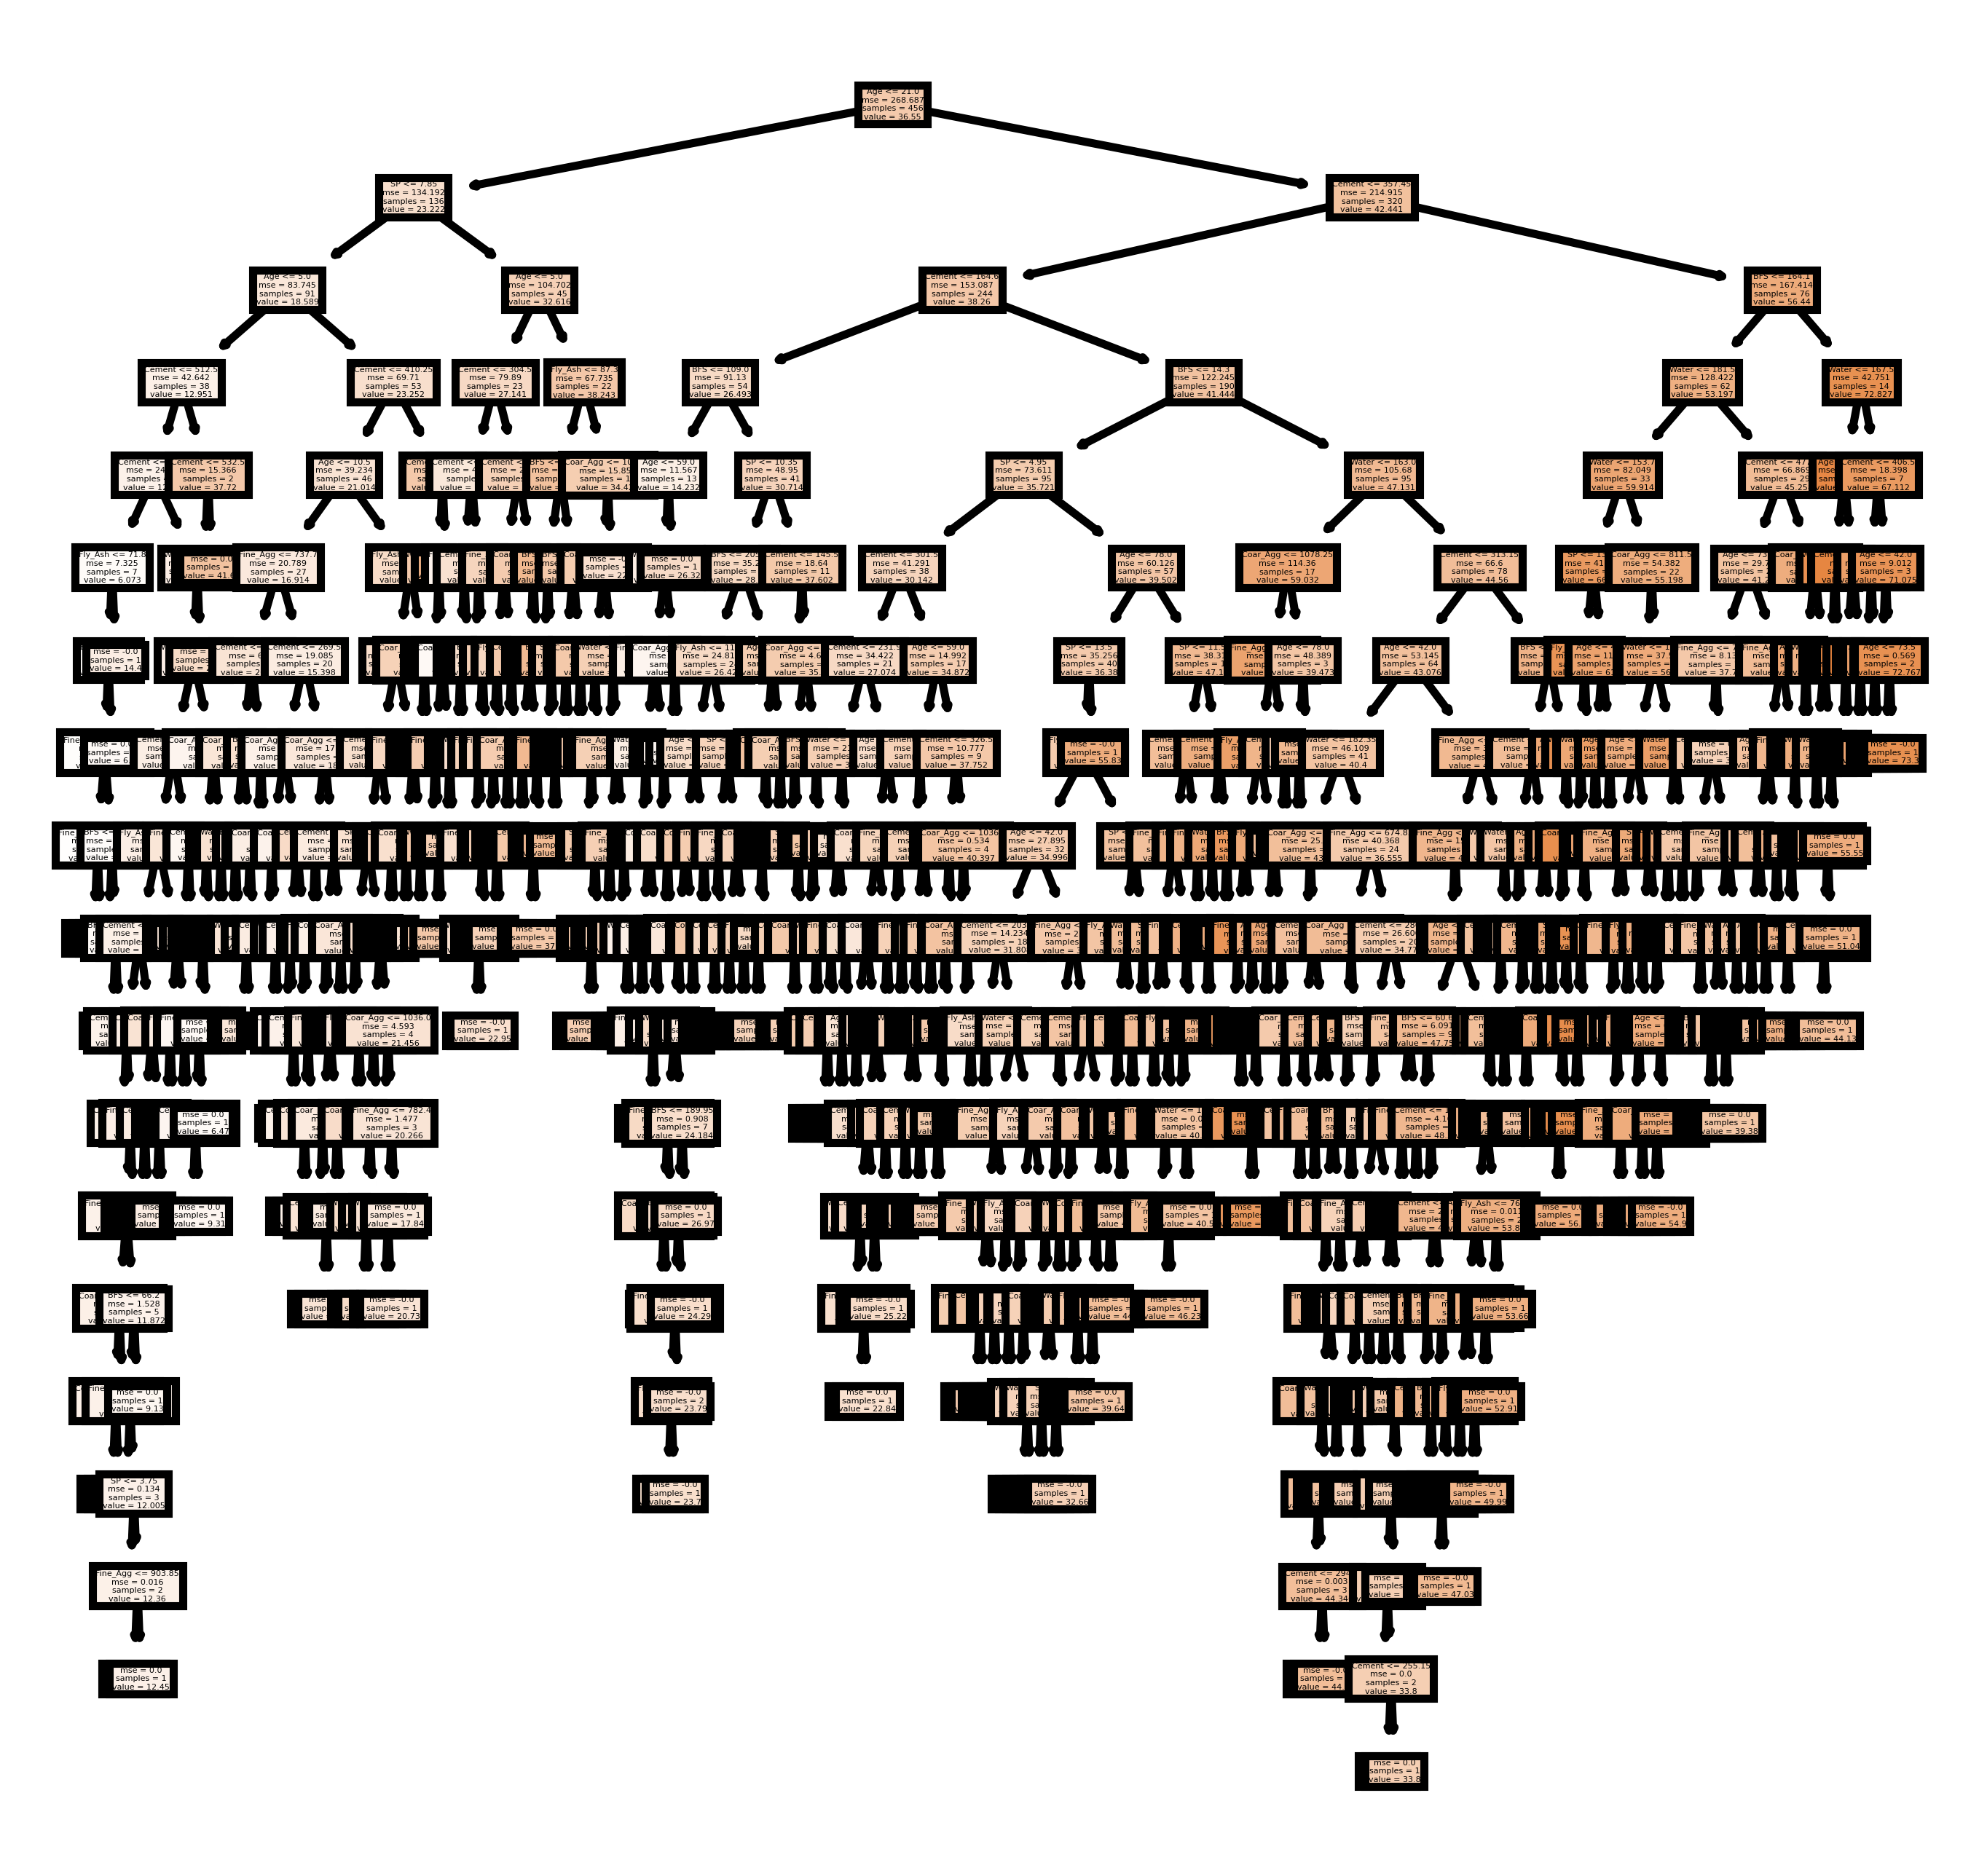

In [36]:
from sklearn.tree import export_graphviz
import os
import matplotlib.pyplot as plt
from sklearn import tree
fn=X_train.columns
cn="Con_com"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_regressor.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_valid.tolist(), valid_predict.tolist())
plt.ylim(0, 100)
plt.xlim(0, 100)
plt.show()

In [33]:
df

,Cement,BFS,Fly_Ash,Water,SP,Coar_Agg,Fine_Agg,Age,Con_com
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
